In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train_test_data = [train, test]

**Изучаем датасет**

In [2]:
print("Train shape "+ str(train.shape))
print(train.head(15))
print(train.describe())
print(train.describe(include=['O']))

Train shape (8693, 14)
   PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0      0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1      0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2      0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3      0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4      0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5      0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6      0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7      0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0  False   
8      0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
9      0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   
10     0008_02     Europa      True  B/1/P    TRAPPIST-1e  34.0  False   
11     0008_03     Europa     False  B/1/P    55 Cancri e  45.0  False   
12     0009_01 

**HomePlanet vs. Transported**

In [3]:
print(train.groupby('HomePlanet').Transported.value_counts())
train[['HomePlanet', 'Transported']].groupby('HomePlanet', as_index = False).mean()

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      True           1404
            False           727
Mars        True            920
            False           839
Name: count, dtype: int64


,HomePlanet,Transported
0,Earth,0.423946
1,Europa,0.658846
2,Mars,0.523024


Добавим mapping и заполним пустые значения

In [4]:
print(train.HomePlanet.value_counts())

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


In [5]:
for dataset in train_test_data:
    dataset['HomePlanet'] = dataset['HomePlanet'].fillna('Earth')

In [6]:
for dataset in train_test_data:
    dataset['HomePlanet'] = dataset['HomePlanet'].map( {'Earth': 0, 'Europa': 1, 'Mars': 2} ).astype(int)

In [7]:
print(train.head())

  PassengerId  HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01           1     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01           0     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01           1     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02           1     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01           0     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         Tru

**CryoSleep vs. Transported**

In [8]:
print(train.groupby('CryoSleep').Transported.value_counts())
train[['CryoSleep', 'Transported']].groupby('CryoSleep', as_index = False).mean()

CryoSleep  Transported
False      False          3650
           True           1789
True       True           2483
           False           554
Name: count, dtype: int64


,CryoSleep,Transported
0,False,0.328921
1,True,0.817583


Добавим mapping и заполним пустые значения

In [9]:
print(train.CryoSleep.value_counts())
for dataset in train_test_data:
    dataset['CryoSleep']=dataset['CryoSleep'].fillna(False)

CryoSleep
False    5439
True     3037
Name: count, dtype: int64


In [10]:
print(train.describe(include=['O']))

       PassengerId    Cabin  Destination    VIP            Name
count         8693     8494         8511   8490            8493
unique        8693     6560            3      2            8473
top        0001_01  G/734/S  TRAPPIST-1e  False  Gollux Reedall
freq             1        8         5915   8291               2


In [11]:
print(train.head(10))

  PassengerId  HomePlanet  CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01           1      False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01           0      False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01           1      False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02           1      False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01           0      False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01           0      False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01           0      False  F/2/S    TRAPPIST-1e  26.0  False   
7     0006_02           0       True  G/0/S    TRAPPIST-1e  28.0  False   
8     0007_01           0      False  F/3/S    TRAPPIST-1e  35.0  False   
9     0008_01           1       True  B/1/P    55 Cancri e  14.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0          0.0        0.0           0.0     0.0     0.0     Maham Ofracculy   
1        109.0  

**Destination vs. Transported**

In [12]:
print(train.groupby('Destination').Transported.value_counts())
train[['Destination', 'Transported']].groupby('Destination', as_index = False).mean()

Destination    Transported
55 Cancri e    True           1098
               False           702
PSO J318.5-22  True            401
               False           395
TRAPPIST-1e    False          3128
               True           2787
Name: count, dtype: int64


,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


Добавим mapping и заполним пустые значения

In [13]:
print(train.Destination.value_counts())

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


In [14]:
for dataset in train_test_data: 
    dataset['Destination'] = dataset['Destination'].fillna('TRAPPIST-1e')
for dataset in train_test_data:
    dataset['Destination'] = dataset['Destination'].map( {'55 Cancri e': 0, 'PSO J318.5-22': 1, 'TRAPPIST-1e': 2} ).astype(int)

In [15]:
print(train.describe())

        HomePlanet  Destination          Age   RoomService     FoodCourt  \
count  8693.000000  8693.000000  8514.000000   8512.000000   8510.000000   
mean      0.649833     1.494306    28.827930    224.687617    458.077203   
std       0.795183     0.814966    14.489021    666.717663   1611.489240   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000     1.000000    19.000000      0.000000      0.000000   
50%       0.000000     2.000000    27.000000      0.000000      0.000000   
75%       1.000000     2.000000    38.000000     47.000000     76.000000   
max       2.000000     2.000000    79.000000  14327.000000  29813.000000   

       ShoppingMall           Spa        VRDeck  
count   8485.000000   8510.000000   8505.000000  
mean     173.729169    311.138778    304.854791  
std      604.696458   1136.705535   1145.717189  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.00

**Age vs. Transported**

Нужно сделать разделение на Age Band

In [16]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

for dataset in train_test_data:
    dataset['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Transported']].groupby(['AgeBand'], as_index=False).mean())

          AgeBand  Transported
0  (-0.079, 15.8]     0.647200
1    (15.8, 31.6]     0.475402
2    (31.6, 47.4]     0.485281
3    (47.4, 63.2]     0.486747
4    (63.2, 79.0]     0.463235


C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\3056128142.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\3056128142.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\3056128142.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

In [17]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
print(train.head(10))

  PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age    VIP  \
0     0001_01           1      False  B/0/P            2    2  False   
1     0002_01           0      False  F/0/S            2    1  False   
2     0003_01           1      False  A/0/S            2    3   True   
3     0003_02           1      False  A/0/S            2    2  False   
4     0004_01           0      False  F/1/S            2    0  False   
5     0005_01           0      False  F/0/P            1    2  False   
6     0006_01           0      False  F/2/S            2    1  False   
7     0006_02           0       True  G/0/S            2    1  False   
8     0007_01           0      False  F/3/S            2    2  False   
9     0008_01           1       True  B/1/P            0    0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0          0.0        0.0           0.0     0.0     0.0     Maham Ofracculy   
1        109.0        9.0          25.0   549.0  

**VIP vs. Transported**

In [18]:
print(train.groupby('VIP').Transported.value_counts())
train[['VIP', 'Transported']].groupby('VIP', as_index = False).mean()

VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
Name: count, dtype: int64


,VIP,Transported
0,False,0.506332
1,True,0.381910


In [19]:
print(train.VIP.value_counts())

VIP
False    8291
True      199
Name: count, dtype: int64


In [20]:
for dataset in train_test_data:
    dataset['VIP'] = dataset['VIP'].fillna(False)

In [21]:
print(train.describe(include=['O']))

       PassengerId    Cabin            Name
count         8693     8494            8493
unique        8693     6560            8473
top        0001_01  G/734/S  Gollux Reedall
freq             1        8               2


**RoomService vs Transported**

In [22]:
for dataset in train_test_data:
    room_avg = dataset['RoomService'].mean()
    room_std = dataset['RoomService'].std()
    room_null_count = dataset['RoomService'].isnull().sum()
    
    room_null_random_list = np.random.randint(room_avg - room_std, room_avg + room_std, size=room_null_count)
    dataset['RoomService'][np.isnan(dataset['RoomService'])] = room_null_random_list
    dataset['RoomService'] = dataset['RoomService'].astype(int)

for dataset in train_test_data:
    dataset['RoomServiceBand'] = pd.cut(train['RoomService'], 2)

print (train[['RoomServiceBand', 'Transported']].groupby(['RoomServiceBand'], as_index=False).mean())

      RoomServiceBand  Transported
0  (-441.754, 6950.0]     0.504262
1   (6950.0, 14327.0]     0.000000


C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\3198094544.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['RoomService'][np.isnan(dataset['RoomService'])] = room_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\3198094544.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['RoomService'][np.isnan(dataset['RoomService'])] = room_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\3198094544.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

In [23]:
for dataset in train_test_data:
    dataset.loc[ dataset['RoomService'] <= 6948, 'RoomService'] = 0
    dataset.loc[ dataset['RoomService'] > 6948, 'RoomService'] = 1

print(train.head())

  PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age    VIP  \
0     0001_01           1      False  B/0/P            2    2  False   
1     0002_01           0      False  F/0/S            2    1  False   
2     0003_01           1      False  A/0/S            2    3   True   
3     0003_02           1      False  A/0/S            2    2  False   
4     0004_01           0      False  F/1/S            2    0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0            0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1            0        9.0          25.0   549.0    44.0       Juanna Vines   
2            0     3576.0           0.0  6715.0    49.0      Altark Susent   
3            0     1283.0         371.0  3329.0   193.0       Solam Susent   
4            0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported       AgeBand     RoomServiceBand  
0        False  (31.6, 47.4]  (-441.754, 6950.0

**FoodCourt vs. Transported**

In [24]:
for dataset in train_test_data:
    food_avg = dataset['FoodCourt'].mean()
    food_std = dataset['FoodCourt'].std()
    food_null_count = dataset['FoodCourt'].isnull().sum()
    
    food_null_random_list = np.random.randint(food_avg - food_std, food_avg + food_std, size=food_null_count)
    dataset['FoodCourt'][np.isnan(dataset['FoodCourt'])] = food_null_random_list
    dataset['FoodCourt'] = dataset['FoodCourt'].astype(int)

for dataset in train_test_data:
    dataset['FoodCourtBand'] = pd.cut(train['FoodCourt'], 4)

print (train[['FoodCourtBand', 'Transported']].groupby(['FoodCourtBand'], as_index=False).mean())

         FoodCourtBand  Transported
0  (-1163.946, 6603.5]     0.501225
1    (6603.5, 14340.0]     0.632075
2   (14340.0, 22076.5]     0.857143
3   (22076.5, 29813.0]     1.000000


C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\828485988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['FoodCourt'][np.isnan(dataset['FoodCourt'])] = food_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\828485988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['FoodCourt'][np.isnan(dataset['FoodCourt'])] = food_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\828485988.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to

In [25]:
for dataset in train_test_data:
    dataset.loc[ dataset['FoodCourt'] <= 6613, 'FoodCourt'] = 0
    dataset.loc[(dataset['FoodCourt'] > 6613) & (dataset['FoodCourt'] <= 14346), 'FoodCourt'] = 1
    dataset.loc[(dataset['FoodCourt'] > 14346) & (dataset['FoodCourt'] <= 22080), 'FoodCourt'] = 2
    dataset.loc[dataset['FoodCourt'] > 22080 , 'FoodCourt'] = 3
print(train.head(10))

  PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age    VIP  \
0     0001_01           1      False  B/0/P            2    2  False   
1     0002_01           0      False  F/0/S            2    1  False   
2     0003_01           1      False  A/0/S            2    3   True   
3     0003_02           1      False  A/0/S            2    2  False   
4     0004_01           0      False  F/1/S            2    0  False   
5     0005_01           0      False  F/0/P            1    2  False   
6     0006_01           0      False  F/2/S            2    1  False   
7     0006_02           0       True  G/0/S            2    1  False   
8     0007_01           0      False  F/3/S            2    2  False   
9     0008_01           1       True  B/1/P            0    0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0            0          0           0.0     0.0     0.0     Maham Ofracculy   
1            0          0          25.0   549.0  

**ShoppingMall vs. Transported**

In [26]:
for dataset in train_test_data:
    shopping_avg = dataset['ShoppingMall'].mean()
    shopping_std = dataset['ShoppingMall'].std()
    shopping_null_count = dataset['ShoppingMall'].isnull().sum()
    
    shopping_null_random_list = np.random.randint(shopping_avg - shopping_std, shopping_avg + shopping_std, size=shopping_null_count)
    dataset['ShoppingMall'][np.isnan(dataset['ShoppingMall'])] = shopping_null_random_list
    dataset['ShoppingMall'] = dataset['ShoppingMall'].astype(int)

for dataset in train_test_data:
    dataset['ShoppingMallBand'] = pd.cut(train['ShoppingMall'], 3)

print (train[['ShoppingMallBand', 'Transported']].groupby(['ShoppingMallBand'], as_index=False).mean())

        ShoppingMallBand  Transported
0   (-448.917, 7547.333]     0.503511
1  (7547.333, 15519.667]     0.600000
2   (15519.667, 23492.0]     1.000000


C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\1571108037.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ShoppingMall'][np.isnan(dataset['ShoppingMall'])] = shopping_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\1571108037.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ShoppingMall'][np.isnan(dataset['ShoppingMall'])] = shopping_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\1571108037.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behav

In [27]:
for dataset in train_test_data:
    dataset.loc[ dataset['ShoppingMall'] <= 7548, 'ShoppingMall'] = 0
    dataset.loc[(dataset['ShoppingMall'] > 7548) & (dataset['ShoppingMall'] <= 15520), 'ShoppingMall'] = 1
    dataset.loc[dataset['ShoppingMall'] > 15520 , 'ShoppingMall'] = 2
print(train.head(10))

  PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age    VIP  \
0     0001_01           1      False  B/0/P            2    2  False   
1     0002_01           0      False  F/0/S            2    1  False   
2     0003_01           1      False  A/0/S            2    3   True   
3     0003_02           1      False  A/0/S            2    2  False   
4     0004_01           0      False  F/1/S            2    0  False   
5     0005_01           0      False  F/0/P            1    2  False   
6     0006_01           0      False  F/2/S            2    1  False   
7     0006_02           0       True  G/0/S            2    1  False   
8     0007_01           0      False  F/3/S            2    2  False   
9     0008_01           1       True  B/1/P            0    0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0            0          0             0     0.0     0.0     Maham Ofracculy   
1            0          0             0   549.0  

**Spa vs. Transported**

In [28]:
for dataset in train_test_data:
    spa_avg = dataset['Spa'].mean()
    spa_std = dataset['Spa'].std()
    spa_null_count = dataset['Spa'].isnull().sum()
    
    spa_null_random_list = np.random.randint(spa_avg - spa_std, spa_avg + spa_std, size=spa_null_count)
    dataset['Spa'][np.isnan(dataset['Spa'])] = spa_null_random_list
    dataset['Spa'] = dataset['Spa'].astype(int)

for dataset in train_test_data:
    dataset['SpaBand'] = pd.cut(train['Spa'], 2)

print (train[['SpaBand', 'Transported']].groupby(['SpaBand'], as_index=False).mean())

               SpaBand  Transported
0  (-847.232, 10792.0]     0.504901
1   (10792.0, 22408.0]     0.000000


C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\3131671440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Spa'][np.isnan(dataset['Spa'])] = spa_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\3131671440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Spa'][np.isnan(dataset['Spa'])] = spa_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\3131671440.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

In [29]:
for dataset in train_test_data:
    dataset.loc[ dataset['Spa'] <= 10802, 'Spa'] = 0
    dataset.loc[dataset['Spa'] > 10802 , 'Spa'] = 1
print(train.head())

  PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age    VIP  \
0     0001_01           1      False  B/0/P            2    2  False   
1     0002_01           0      False  F/0/S            2    1  False   
2     0003_01           1      False  A/0/S            2    3   True   
3     0003_02           1      False  A/0/S            2    2  False   
4     0004_01           0      False  F/1/S            2    0  False   

   RoomService  FoodCourt  ShoppingMall  Spa  VRDeck               Name  \
0            0          0             0    0     0.0    Maham Ofracculy   
1            0          0             0    0    44.0       Juanna Vines   
2            0          0             0    0    49.0      Altark Susent   
3            0          0             0    0   193.0       Solam Susent   
4            0          0             0    0     2.0  Willy Santantines   

   Transported       AgeBand     RoomServiceBand        FoodCourtBand  \
0        False  (31.6, 47.4]  (-441.754, 69

**VRDeck vs. Transported**

In [30]:
for dataset in train_test_data:
    VRDeck_avg = dataset['VRDeck'].mean()
    VRDeck_std = dataset['VRDeck'].std()
    VRDeck_null_count = dataset['VRDeck'].isnull().sum()
    
    VRDeck_null_random_list = np.random.randint(VRDeck_avg - VRDeck_std, VRDeck_avg + VRDeck_std, size=VRDeck_null_count)
    dataset['VRDeck'][np.isnan(dataset['VRDeck'])] = VRDeck_null_random_list
    dataset['VRDeck'] = dataset['VRDeck'].astype(int)

for dataset in train_test_data:
    dataset['VRDeckBand'] = pd.cut(train['VRDeck'], 2)

print (train[['VRDeckBand', 'Transported']].groupby(['VRDeckBand'], as_index=False).mean())

           VRDeckBand  Transported
0  (-851.96, 11653.0]     0.504494
1  (11653.0, 24133.0]     0.000000


C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\791651786.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['VRDeck'][np.isnan(dataset['VRDeck'])] = VRDeck_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\791651786.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['VRDeck'][np.isnan(dataset['VRDeck'])] = VRDeck_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\791651786.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt t

In [31]:
for dataset in train_test_data:
    dataset.loc[ dataset['VRDeck'] <= 10802, 'VRDeck'] = 0
    dataset.loc[dataset['VRDeck'] > 10802 , 'VRDeck'] = 1
print(train.head(10))

  PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age    VIP  \
0     0001_01           1      False  B/0/P            2    2  False   
1     0002_01           0      False  F/0/S            2    1  False   
2     0003_01           1      False  A/0/S            2    3   True   
3     0003_02           1      False  A/0/S            2    2  False   
4     0004_01           0      False  F/1/S            2    0  False   
5     0005_01           0      False  F/0/P            1    2  False   
6     0006_01           0      False  F/2/S            2    1  False   
7     0006_02           0       True  G/0/S            2    1  False   
8     0007_01           0      False  F/3/S            2    2  False   
9     0008_01           1       True  B/1/P            0    0  False   

   RoomService  FoodCourt  ShoppingMall  Spa  VRDeck                Name  \
0            0          0             0    0       0     Maham Ofracculy   
1            0          0             0    0       0   

**Cabin fix**

In [32]:
for dataset in train_test_data:
    dataset.dropna(subset=['Cabin'],inplace=True)

**New features with Cabin**

In [33]:
new_features = train['Cabin'].str.split('/', expand=True)
new_features.columns = ['CabinFirst', 'CabinSecond', 'CabinThird']
train = pd.concat([train, new_features], axis=1)
new_features = test['Cabin'].str.split('/', expand=True)
new_features.columns = ['CabinFirst', 'CabinSecond', 'CabinThird']
test = pd.concat([test, new_features], axis=1)
print(train.head(10))

  PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age    VIP  \
0     0001_01           1      False  B/0/P            2    2  False   
1     0002_01           0      False  F/0/S            2    1  False   
2     0003_01           1      False  A/0/S            2    3   True   
3     0003_02           1      False  A/0/S            2    2  False   
4     0004_01           0      False  F/1/S            2    0  False   
5     0005_01           0      False  F/0/P            1    2  False   
6     0006_01           0      False  F/2/S            2    1  False   
7     0006_02           0       True  G/0/S            2    1  False   
8     0007_01           0      False  F/3/S            2    2  False   
9     0008_01           1       True  B/1/P            0    0  False   

   RoomService  FoodCourt  ShoppingMall  ...  Transported         AgeBand  \
0            0          0             0  ...        False    (31.6, 47.4]   
1            0          0             0  ...         

In [34]:
print(train.groupby('CabinFirst').Transported.value_counts())
train[['CabinFirst', 'Transported']].groupby('CabinFirst', as_index = False).mean()
train_test_data = [train,test]

CabinFirst  Transported
A           False           129
            True            127
B           True            572
            False           207
C           True            508
            False           239
D           False           271
            True            207
E           False           563
            True            313
F           False          1565
            True           1229
G           True           1321
            False          1238
T           False             4
            True              1
Name: count, dtype: int64


In [35]:
for dataset in train_test_data:
    dataset['CabinFirst'] = dataset['CabinFirst'].map( {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7} ).astype(int)

In [36]:
print(train.groupby('CabinThird').Transported.value_counts())
train[['CabinThird', 'Transported']].groupby('CabinThird', as_index = False).mean()

CabinThird  Transported
P           False          2308
            True           1898
S           True           2380
            False          1908
Name: count, dtype: int64


,CabinThird,Transported
0,P,0.451260
1,S,0.555037


In [37]:
for dataset in train_test_data:
    dataset['CabinThird'] = dataset['CabinThird'].map({'P': 0, 'S': 1}).astype(int)

In [38]:
for dataset in train_test_data:
    dataset['CabinSecond'] = dataset['CabinSecond'].astype(int)
    cabin_avg = dataset['CabinSecond'].mean()
    cabin_std = dataset['CabinSecond'].std()
    cabin_null_count = dataset['CabinSecond'].isnull().sum()
    
    cabin_null_random_list = np.random.randint(cabin_avg - cabin_std, cabin_avg + cabin_std, size=cabin_null_count)
    dataset['CabinSecond'][np.isnan(dataset['CabinSecond'])] = cabin_null_random_list
    dataset['CabinSecond'] = dataset['CabinSecond'].astype(int)

for dataset in train_test_data:
    dataset['CabinSecondBand'] = pd.cut(train['CabinSecond'], 7)

print (train[['CabinSecondBand', 'Transported']].groupby(['CabinSecondBand'], as_index=False).mean())

        CabinSecondBand  Transported
0     (-1.894, 270.571]     0.540055
1    (270.571, 541.143]     0.429142
2    (541.143, 811.714]     0.495248
3   (811.714, 1082.286]     0.625546
4  (1082.286, 1352.857]     0.485816
5  (1352.857, 1623.429]     0.400929
6    (1623.429, 1894.0]     0.419263


C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\2756675656.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['CabinSecond'][np.isnan(dataset['CabinSecond'])] = cabin_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\2756675656.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['CabinSecond'][np.isnan(dataset['CabinSecond'])] = cabin_null_random_list
C:\Users\zhest\AppData\Local\Temp\ipykernel_4784\2756675656.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obs

In [39]:
for dataset in train_test_data:
    dataset.loc[ dataset['CabinSecond'] <= 271, 'CabinSecond'] = 0
    dataset.loc[(dataset['CabinSecond'] > 271) & (dataset['CabinSecond'] <= 542), 'CabinSecond'] = 1
    dataset.loc[(dataset['CabinSecond'] > 542) & (dataset['CabinSecond'] <= 812), 'CabinSecond'] = 2
    dataset.loc[(dataset['CabinSecond'] > 812) & (dataset['CabinSecond'] <= 1083), 'CabinSecond'] = 3
    dataset.loc[(dataset['CabinSecond'] > 1083) & (dataset['CabinSecond'] <= 1353), 'CabinSecond'] = 4
    dataset.loc[(dataset['CabinSecond'] > 1353) & (dataset['CabinSecond'] <= 1624), 'CabinSecond'] = 5
    dataset.loc[ dataset['CabinSecond'] > 1624, 'CabinSecond'] = 6
print(train.head(10))

  PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age    VIP  \
0     0001_01           1      False  B/0/P            2    2  False   
1     0002_01           0      False  F/0/S            2    1  False   
2     0003_01           1      False  A/0/S            2    3   True   
3     0003_02           1      False  A/0/S            2    2  False   
4     0004_01           0      False  F/1/S            2    0  False   
5     0005_01           0      False  F/0/P            1    2  False   
6     0006_01           0      False  F/2/S            2    1  False   
7     0006_02           0       True  G/0/S            2    1  False   
8     0007_01           0      False  F/3/S            2    2  False   
9     0008_01           1       True  B/1/P            0    0  False   

   RoomService  FoodCourt  ShoppingMall  ...         AgeBand  \
0            0          0             0  ...    (31.6, 47.4]   
1            0          0             0  ...    (15.8, 31.6]   
2            0 

**New features with Name**

Features correlation

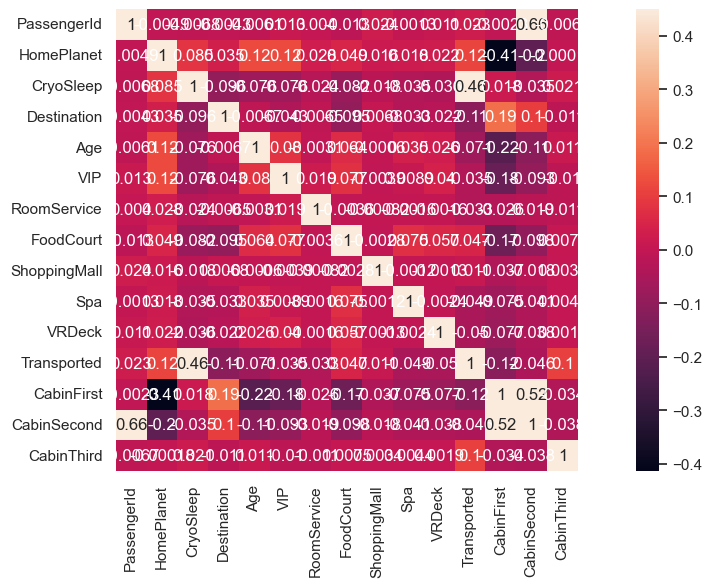

In [40]:
features_drop = ['Name', 'AgeBand', 'Cabin', 'RoomServiceBand', 'FoodCourtBand', 'ShoppingMallBand', 'SpaBand', 'VRDeckBand', 'CabinSecondBand', 'Cabin']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
corr_matrix = train.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, vmax=0.45, square=True, annot=True)
train.to_csv('data/trainProcessed.csv')
test.to_csv('data/testProcessed.csv')